# **Cantidad pedido**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

data = pd.read_excel("/content/drive/MyDrive/Modelos de inventarios.xlsx",sheet_name="M_varios_periodos2")
data

,x,p,α,r,c,h,D_max,nivel_optimo,cantidad_pedido
0,10,3,0.8,2,1,0.1,10,13.714286,3.714286
1,1,67,0.6,6,44,0.3,39,3.469154,2.469154
2,8,85,0.7,16,29,0.5,18,12.538206,4.538206
3,7,87,0.8,20,24,0.5,45,39.245902,32.245902
4,4,54,0.3,22,49,0.2,34,9.232759,5.232759
...,...,...,...,...,...,...,...,...,...
95,10,92,0.8,23,51,0.2,18,7.735537,0.000000
96,6,66,0.6,4,55,0.7,27,-6.166911,0.000000
97,4,81,0.4,5,44,0.2,41,12.855107,8.855107
98,9,69,0.8,24,35,0.7,27,17.830872,8.830872


In [ ]:
data = data.dropna()

In [ ]:
features = np.asarray(data[["x",	"p",	"α",	"r",	"c",	"h",	"D_max",	"nivel_optimo"]])
targets = np.asarray(data["cantidad_pedido"])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits = k, shuffle = True)
d_tree = DecisionTreeRegressor(max_depth= 50)

In [ ]:
# declarar un array para los precios predichos en cada iteración

all_predictions = np.zeros_like(targets)

for train_indices, test_indices in kf.split(features):
  train_features, test_features = features[train_indices], features[test_indices]
  train_targets, test_targets = targets[train_indices] , targets[test_indices]

  ## Entrenar el decision tree
  d_tree.fit(train_features,train_targets)

  ## Predecir usando el modelo
  predictions = d_tree.predict(test_features)

  ## Ponemos las predicciones en el array de all_predictions creado above
  all_predictions[test_indices] = predictions


## Evaluamos el modelo usando la diferencia de medianas de todas las predicciones realizadas
eval_model = np.median(np.abs(all_predictions - targets))
eval_model

0.5147017902859972

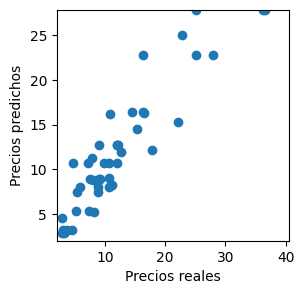

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize = (3,3))
plt.scatter(targets, all_predictions)
plt.xlim(2,targets.max())
plt.ylim(2,predictions.max())
plt.xlabel("Precios reales")
plt.ylabel("Precios predichos")
plt.show()

In [ ]:
test_features

array([[  8.        ,  85.        ,   0.7       ,  16.        ,
         29.        ,   0.5       ,  18.        ,  12.53820598],
       [ 10.        ,  63.        ,   0.4       ,   5.        ,
         41.        ,   0.4       ,  11.        ,   2.0873494 ],
       [ 10.        ,  31.        ,   0.6       ,  88.        ,
         43.        ,   0.6       ,  30.        ,  46.25748503],
       [  7.        ,  40.        ,   0.6       ,  19.        ,
         28.        ,   0.8       ,  44.        ,  23.27272727],
       [  9.        ,  56.        ,   0.7       ,  55.        ,
         48.        ,   0.1       ,  26.        ,  24.31680441],
       [  8.        ,  44.        ,   0.7       ,  10.        ,
         27.        ,   0.2       ,  15.        ,   4.79872881],
       [  7.        ,  86.        ,   0.3       ,   8.        ,
         24.        ,   0.4       ,  21.        ,  14.8826087 ],
       [  8.        ,  35.        ,   0.5       ,  13.        ,
         25.        ,   0.1      

In [ ]:
cop = d_tree.predict([[10,	3,	0.8,	2,	1,	0.1,	10,	13.714286]])

In [ ]:
cop

array([3.71428571])